In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

file = 'drug-overdose-death-rates.csv'


In [40]:
drugdf = pd.read_csv(file)

In [41]:
drugdf.describe()

,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2009.500000,8.231818,2.350000,2.081818,3.145455,3.809091
std,6.493587,4.856747,1.351454,1.685692,4.716004,1.256567
min,1999.000000,2.900000,1.300000,0.600000,0.300000,1.200000
25%,2004.250000,4.800000,1.425000,0.700000,0.600000,2.975000
50%,2009.500000,6.700000,1.750000,1.050000,0.850000,4.350000
75%,2014.750000,10.050000,2.425000,3.925000,2.775000,4.675000
max,2020.000000,21.400000,6.000000,4.900000,17.800000,5.200000


In [42]:
drugdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            22 non-null     object 
 1   Code                                              22 non-null     object 
 2   Year                                              22 non-null     int64  
 3   Any opioid death rates (CDC WONDER)               22 non-null     float64
 4   Cocaine overdose death rates (CDC WONDER)         22 non-null     float64
 5   Heroin overdose death rates (CDC WONDER)          22 non-null     float64
 6   Synthetic opioids death rates (CDC WONDER)        22 non-null     float64
 7   Prescription Opioids death rates (US CDC WONDER)  22 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ KB


In [43]:
drugdf.head()

,Entity,Code,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
0,United States,USA,1999,2.9,1.4,0.7,0.3,1.2
1,United States,USA,2000,3.0,1.3,0.7,0.3,1.3
2,United States,USA,2001,3.3,1.3,0.6,0.3,1.7
3,United States,USA,2002,4.1,1.6,0.7,0.4,2.3
4,United States,USA,2003,4.5,1.8,0.7,0.5,2.6


In [44]:
drugdf.duplicated().sum() # shows there are no duplicates

0

In [45]:
# show a list of columns in the dataframe
list = drugdf.columns.tolist()
list

['Entity',
 'Code',
 'Year',
 'Any opioid death rates (CDC WONDER)',
 'Cocaine overdose death rates (CDC WONDER)',
 'Heroin overdose death rates (CDC WONDER)',
 'Synthetic opioids death rates (CDC WONDER)',
 'Prescription Opioids death rates (US CDC WONDER)']

In [46]:
columns_to_drop = ['Entity', 'Code'] # columns to drop
drugdf.drop(columns_to_drop, axis=1, inplace=True) # drop the columns
drugdf

,Year,Any opioid death rates (CDC WONDER),Cocaine overdose death rates (CDC WONDER),Heroin overdose death rates (CDC WONDER),Synthetic opioids death rates (CDC WONDER),Prescription Opioids death rates (US CDC WONDER)
0,1999,2.9,1.4,0.7,0.3,1.2
1,2000,3.0,1.3,0.7,0.3,1.3
2,2001,3.3,1.3,0.6,0.3,1.7
3,2002,4.1,1.6,0.7,0.4,2.3
4,2003,4.5,1.8,0.7,0.5,2.6
5,2004,4.7,1.9,0.6,0.6,2.9
6,2005,5.1,2.1,0.7,0.6,3.2
7,2006,5.9,2.5,0.7,0.9,3.9
8,2007,6.1,2.2,0.8,0.7,4.2
9,2008,6.4,1.7,1.0,0.8,4.3


In [47]:
drugdf.rename(columns={"Any opioid death rates (CDC WONDER)" : "Any Drug Death", 
                       "Cocaine overdose death rates (CDC WONDER)" : "Cocain Deaths", 
                       "Heroin overdose death rates (CDC WONDER)" : "Heroin Deaths", 
                       "Synthetic opioids death rates (CDC WONDER)" : "Synth Drug Deaths", 
                       "Prescription Opioids death rates (US CDC WONDER)" : "Prescription Opioid Deaths"}, 
                       inplace=True) # renames columns to desired names

In [48]:
drugdf.head()

,Year,Any Drug Death,Cocain Deaths,Heroin Deaths,Synth Drug Deaths,Prescription Opioid Deaths
0,1999,2.9,1.4,0.7,0.3,1.2
1,2000,3.0,1.3,0.7,0.3,1.3
2,2001,3.3,1.3,0.6,0.3,1.7
3,2002,4.1,1.6,0.7,0.4,2.3
4,2003,4.5,1.8,0.7,0.5,2.6


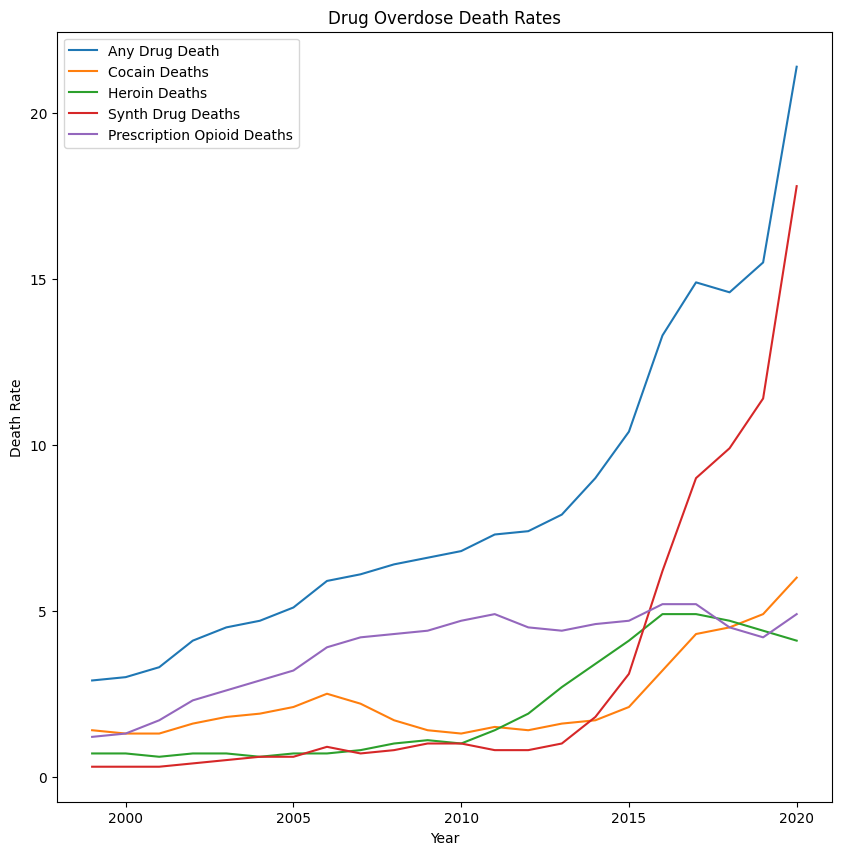

In [56]:
plt.figure(figsize=(10,10)) # set figure size

for column in ['Any Drug Death', 'Cocain Deaths', 'Heroin Deaths', 'Synth Drug Deaths', 'Prescription Opioid Deaths']: # loop through columns   
    plt.plot(drugdf['Year'], drugdf[column], label=column) # plot each column

plt.title("Drug Overdose Death Rates")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.legend()
plt.show() # show plot



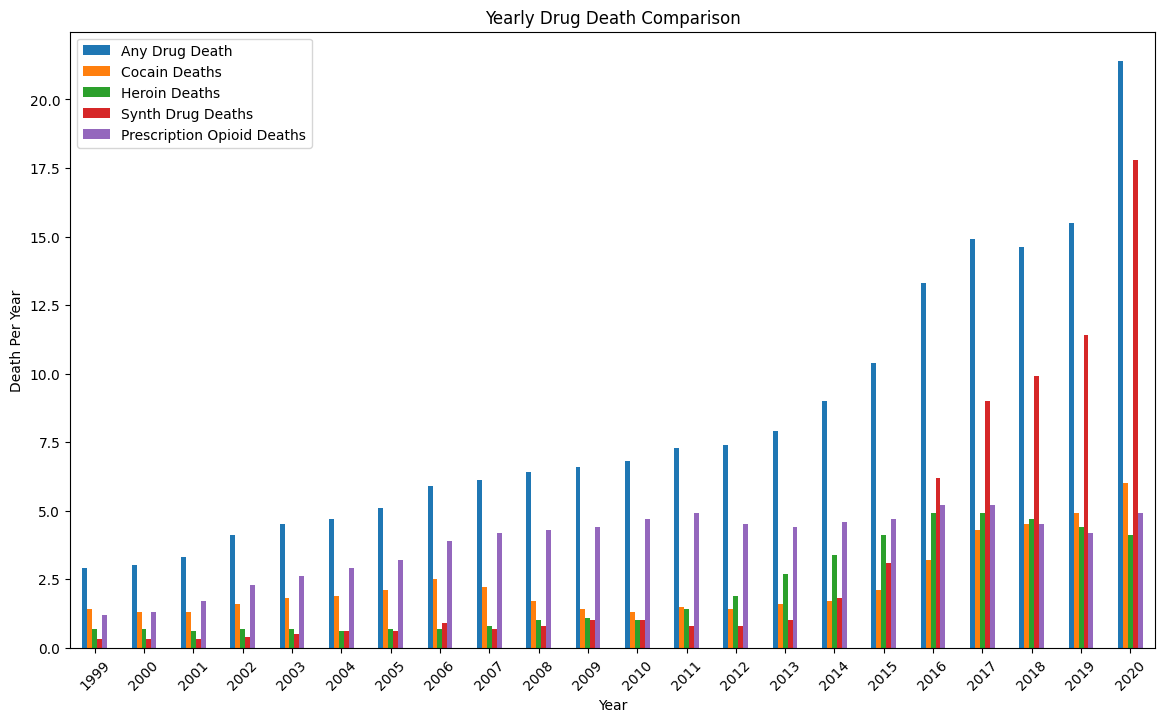

In [70]:
column_list = ['Any Drug Death', 'Cocain Deaths', 'Heroin Deaths', 'Synth Drug Deaths', 'Prescription Opioid Deaths']

drugdf[column_list].plot(kind='bar', figsize=(14,8))

plt.title("Yearly Drug Death Comparison")
plt.xlabel("Year")
plt.ylabel("Death Per Year")

years = drugdf['Year']
plt.xticks(range(len(years)), years, rotation=45)
plt.show() # show plot  

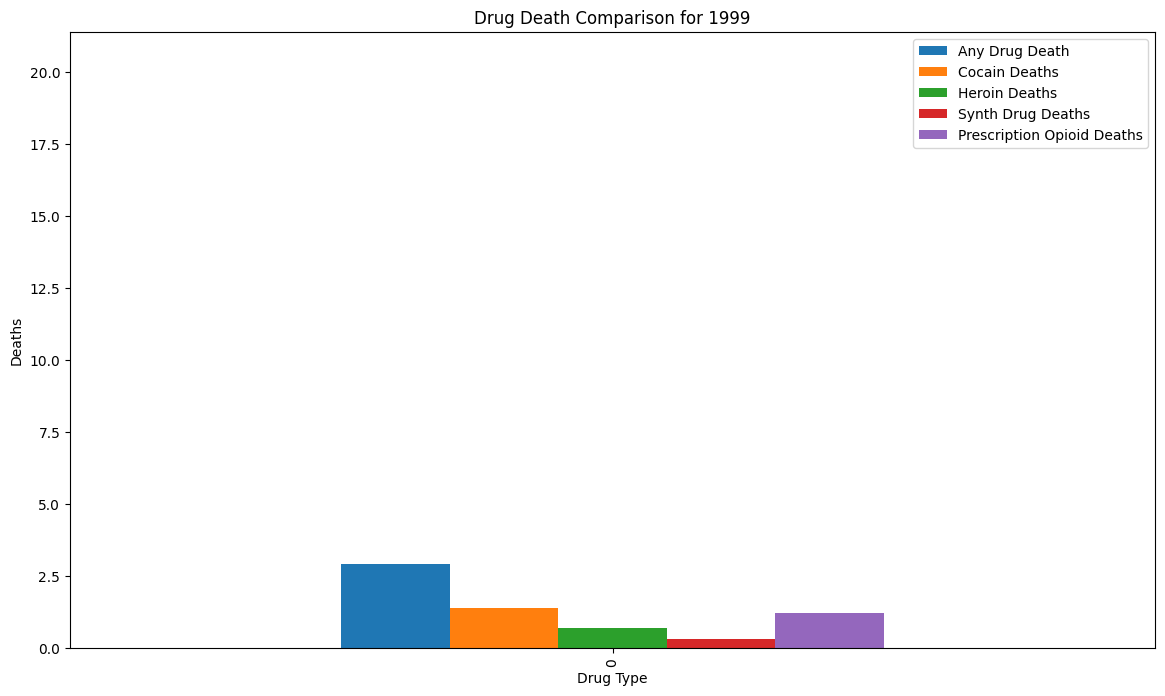

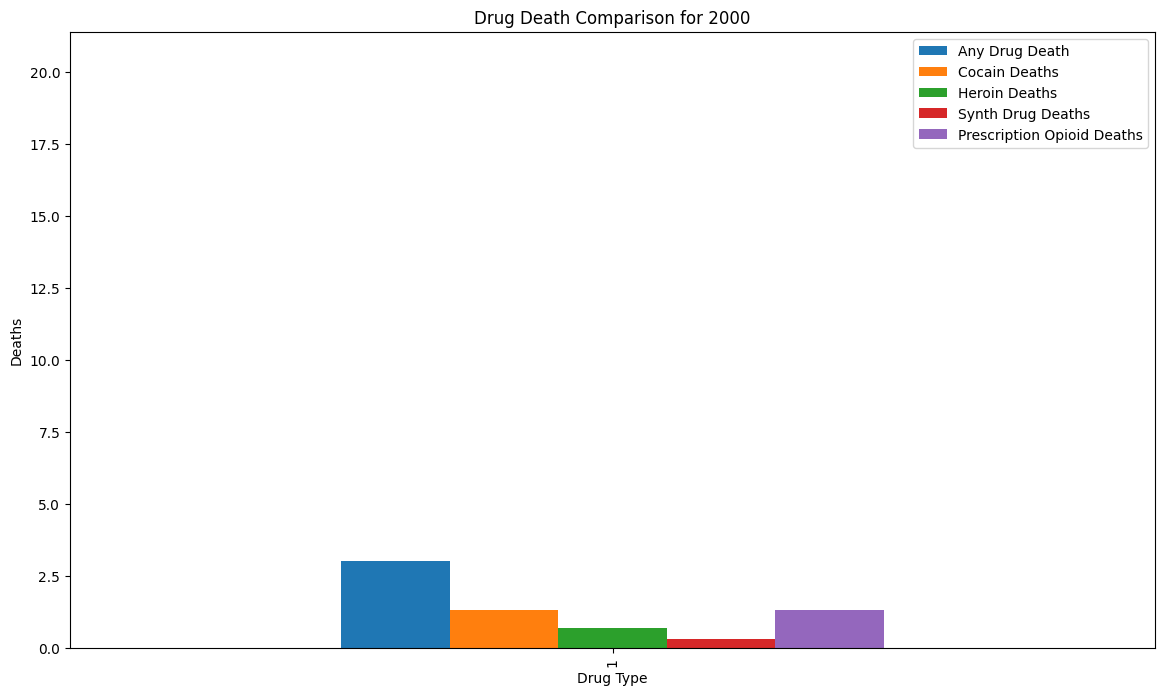

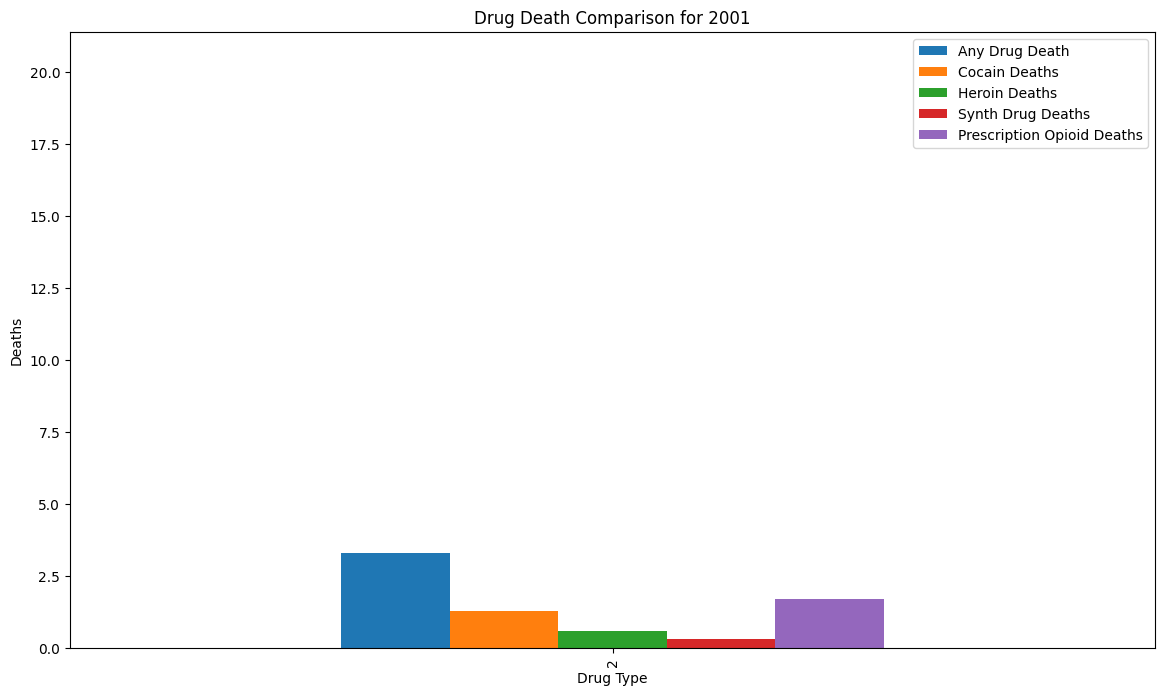

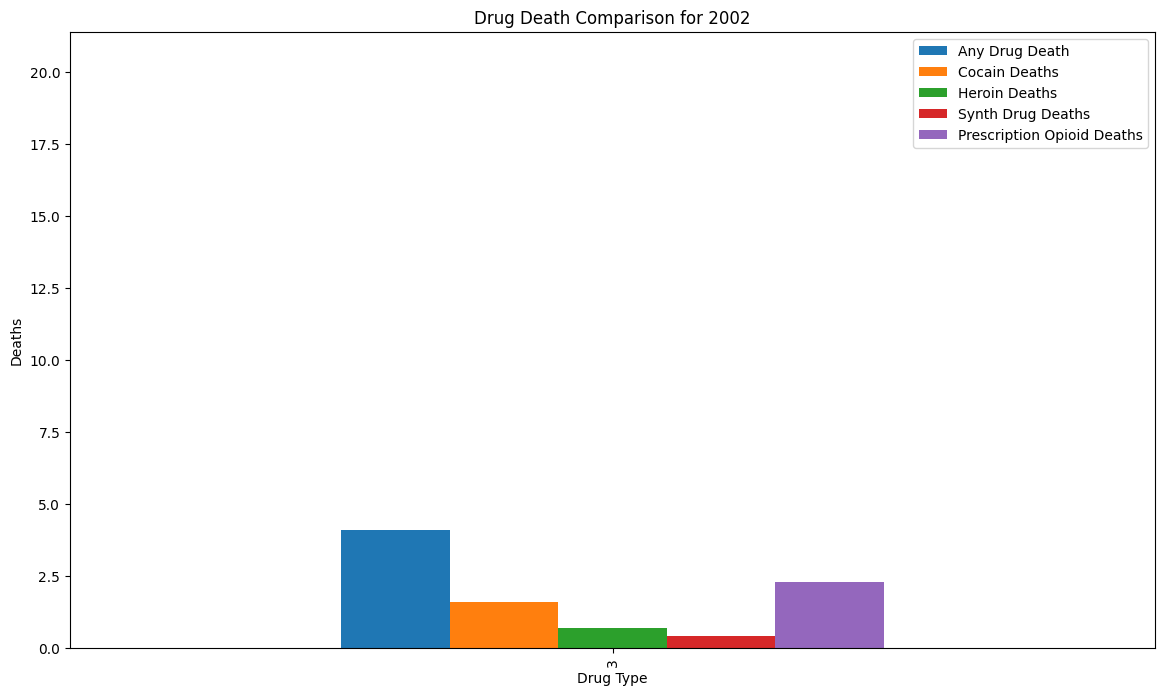

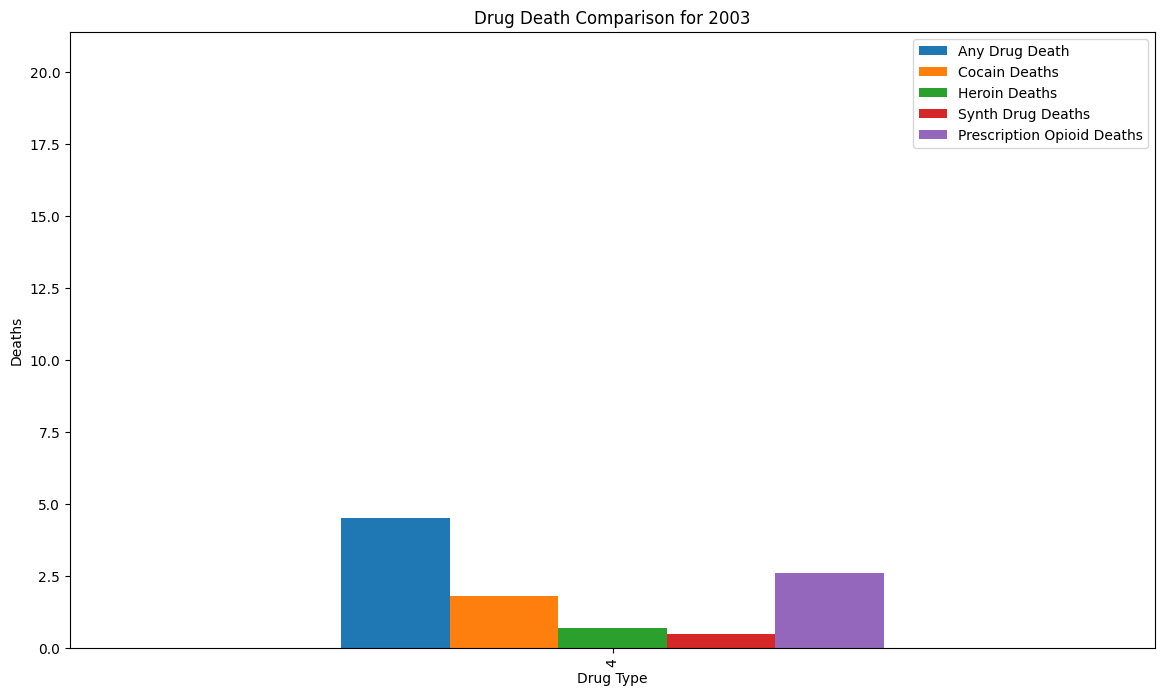

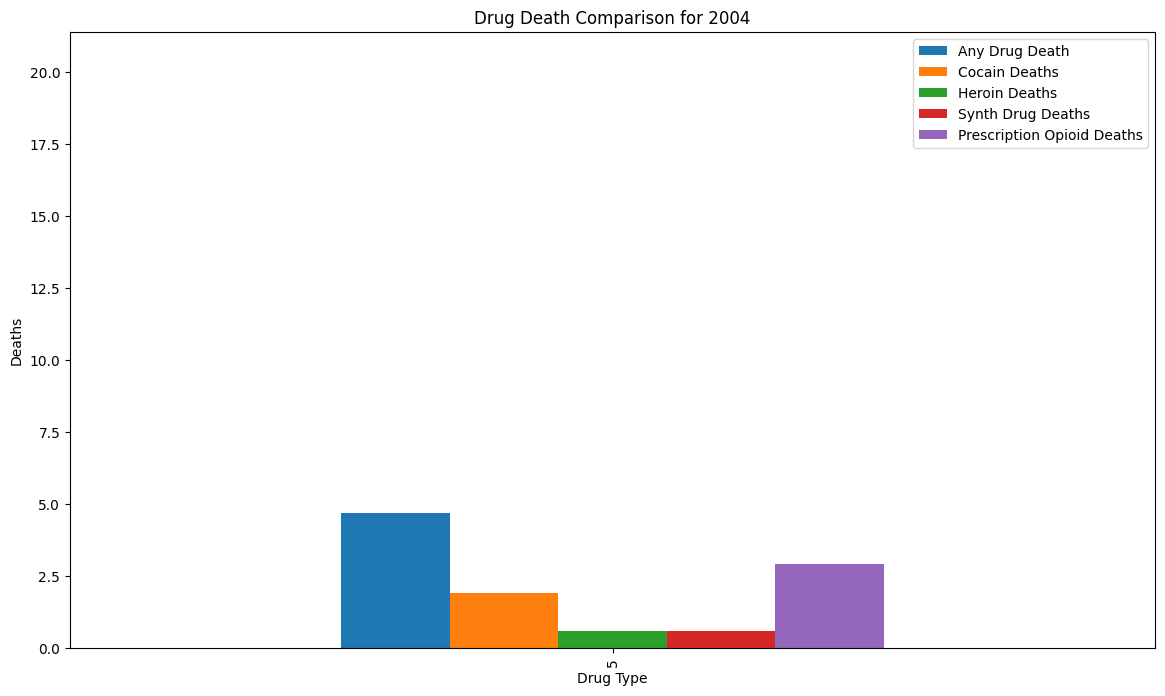

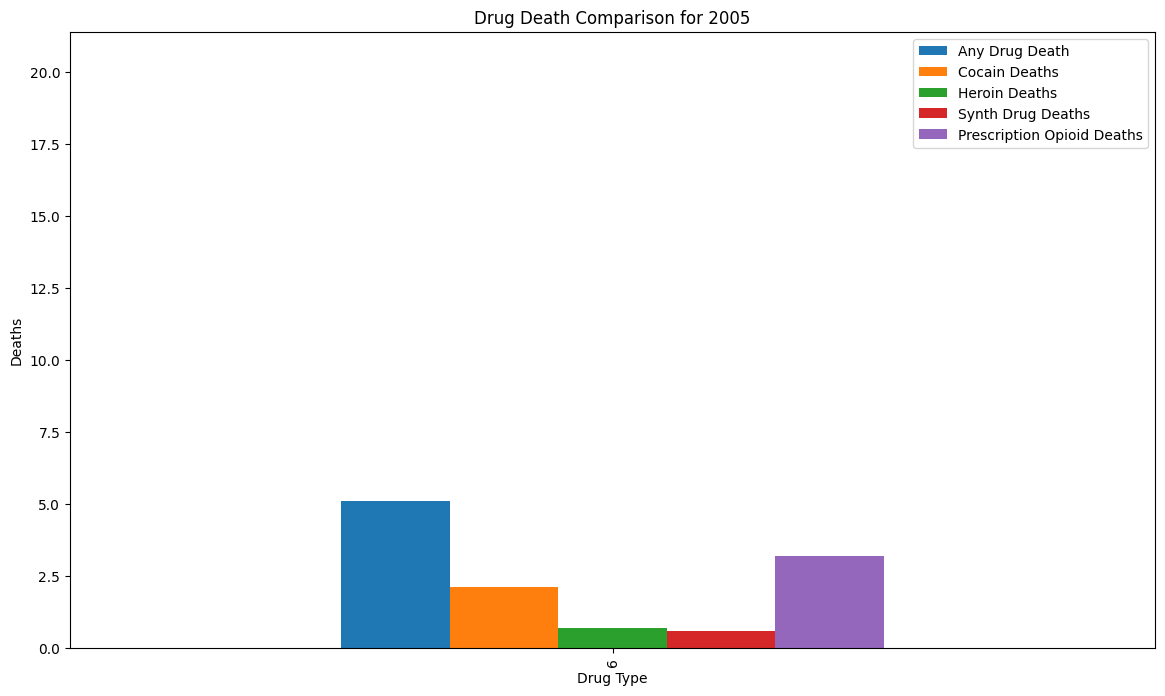

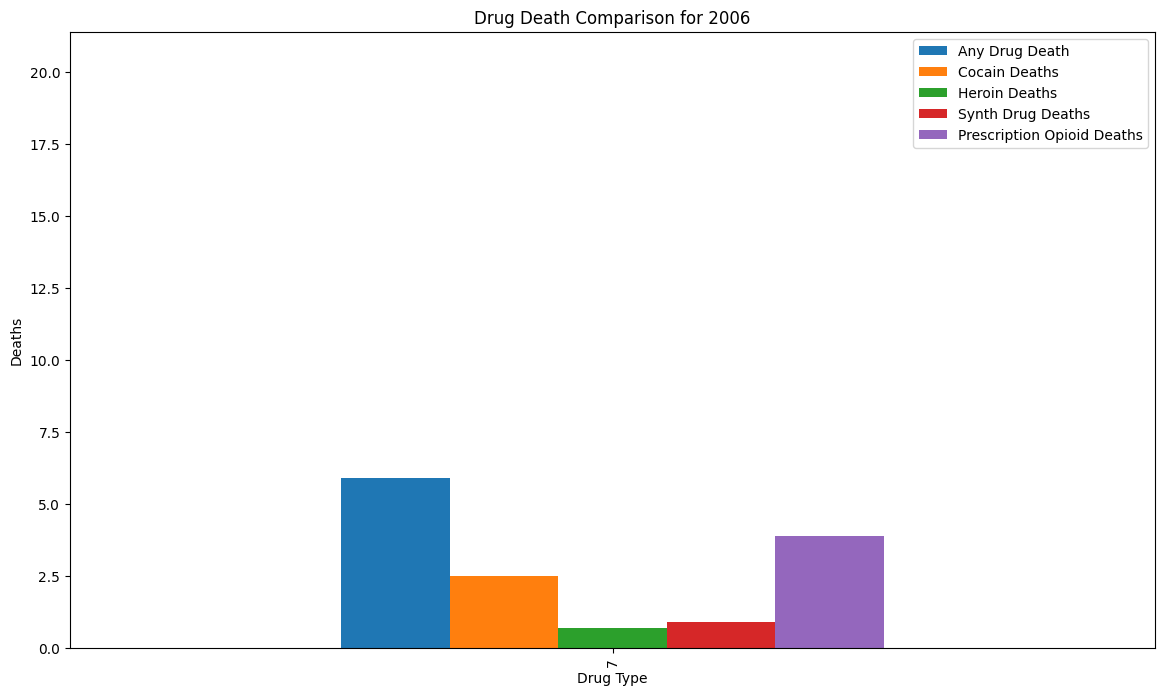

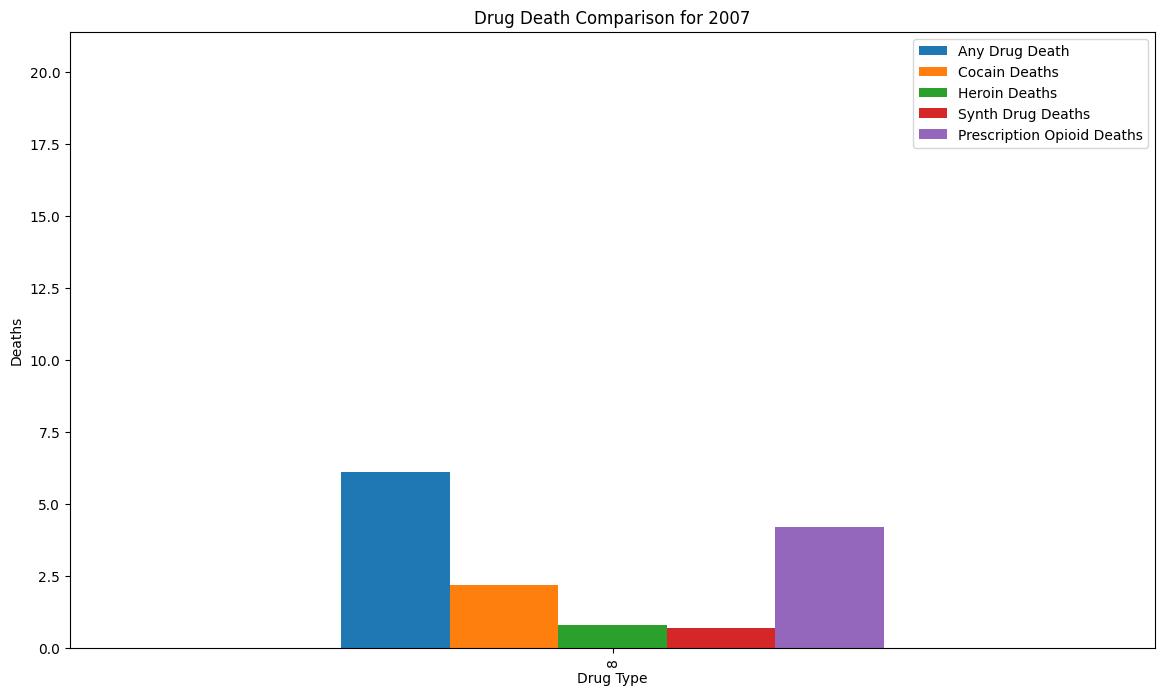

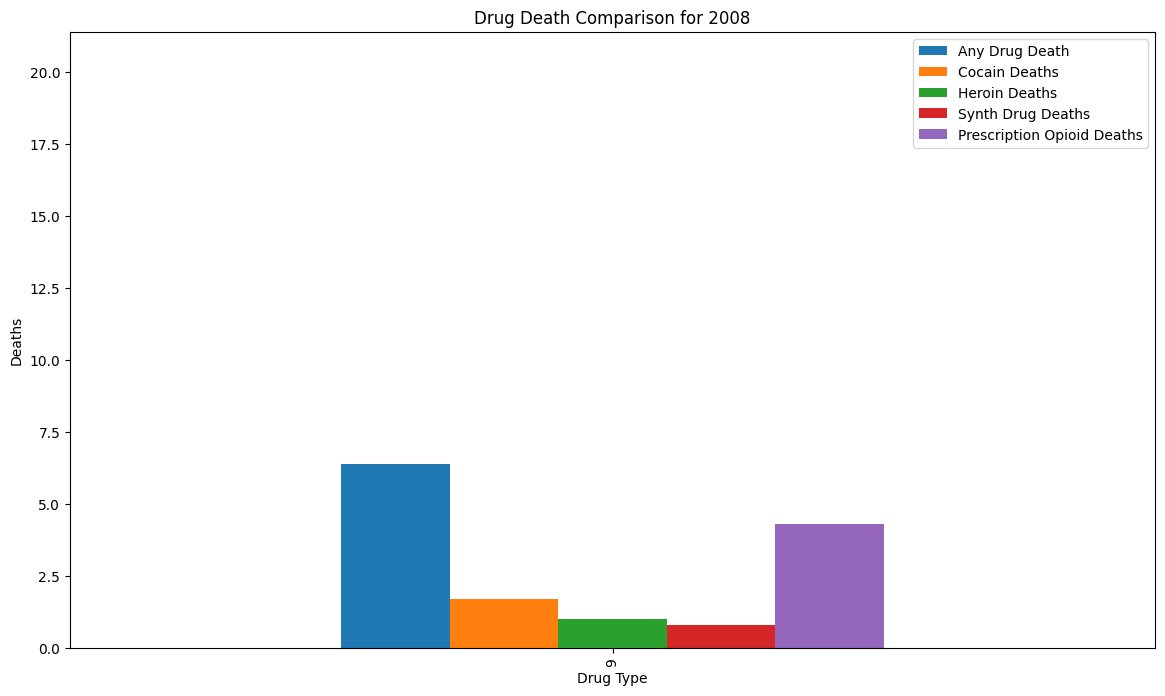

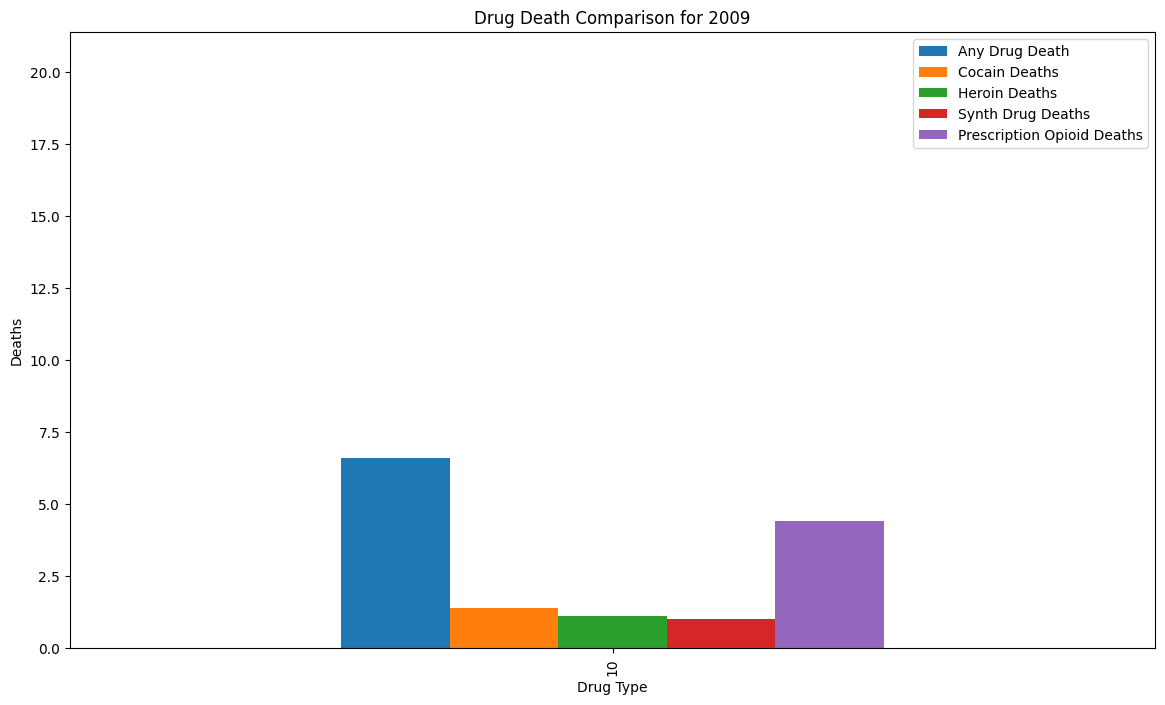

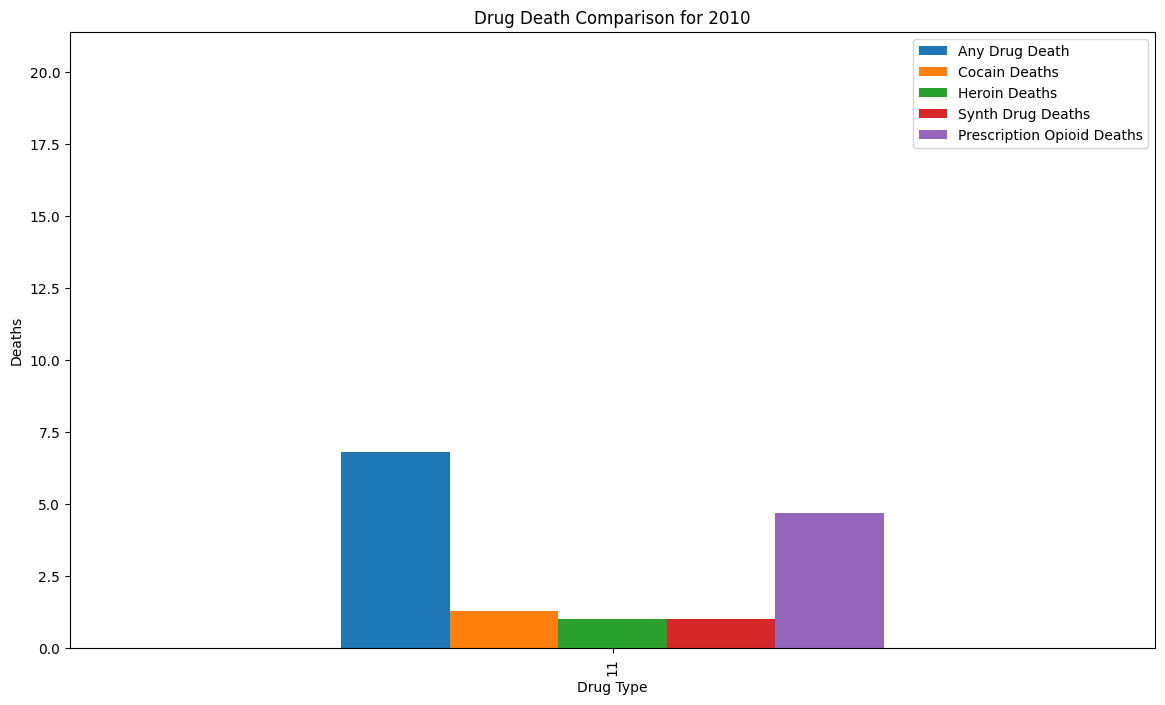

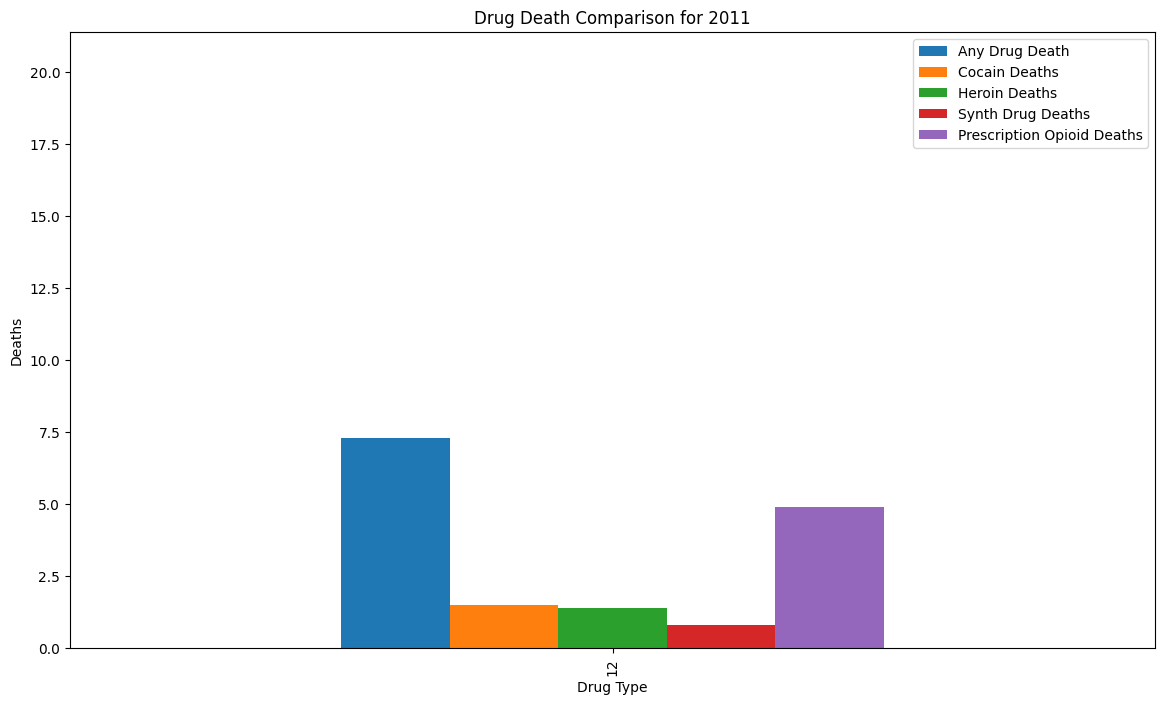

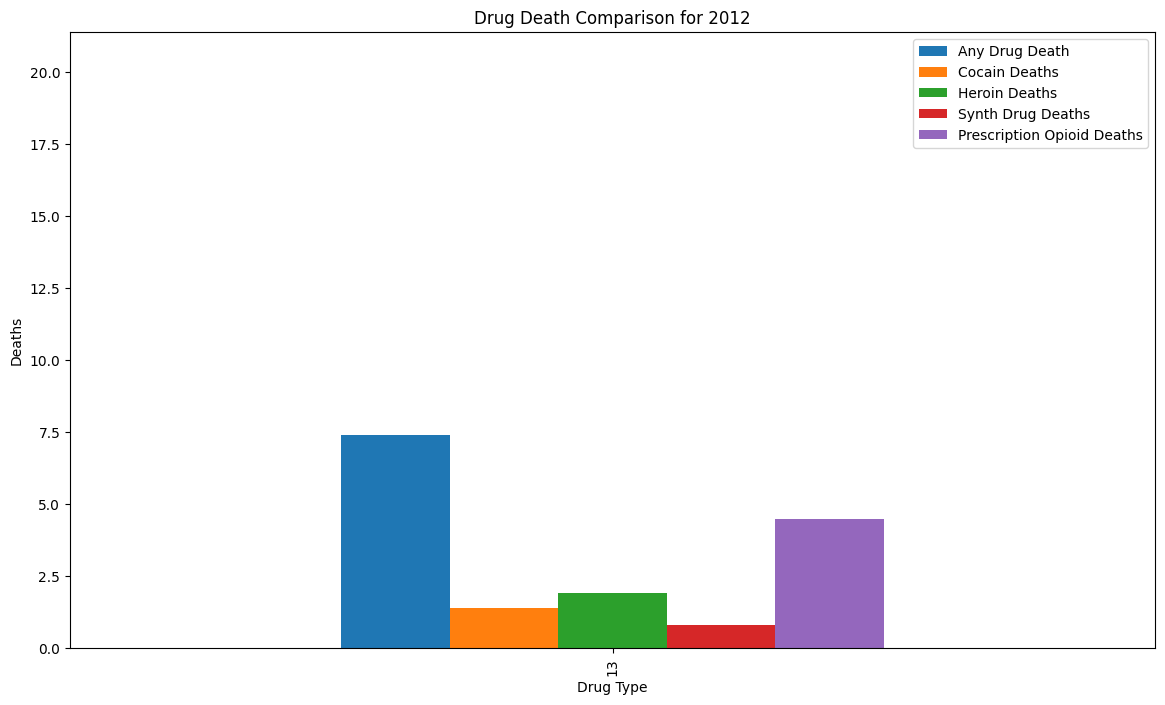

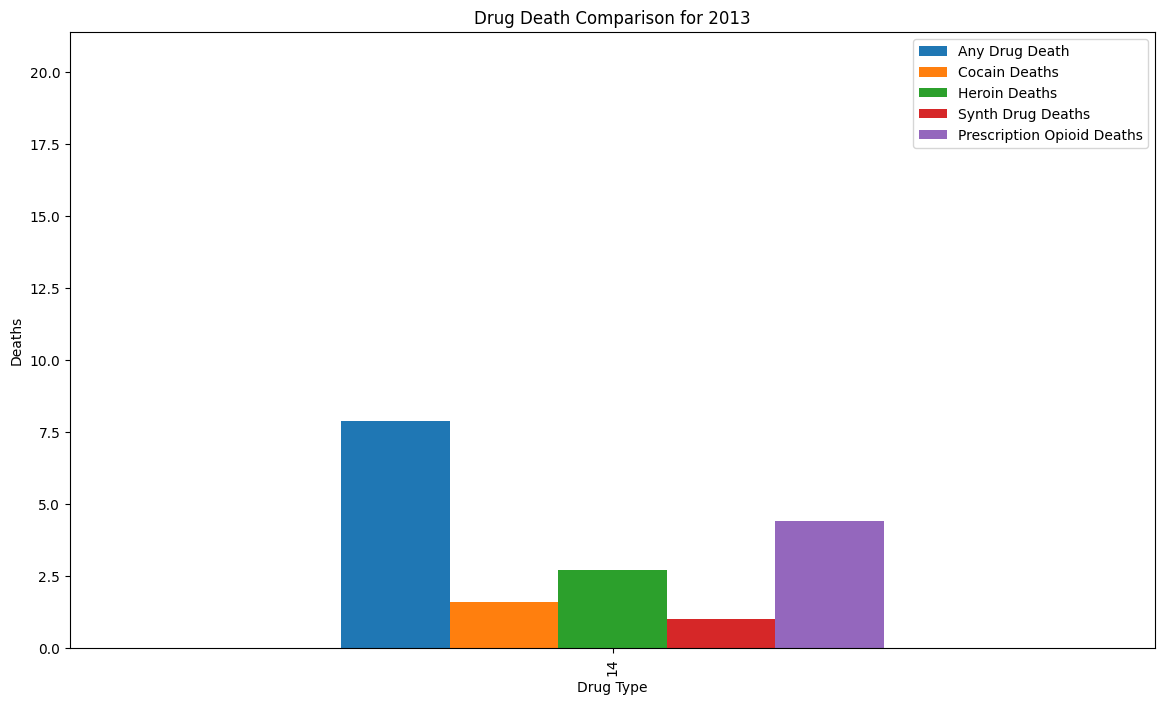

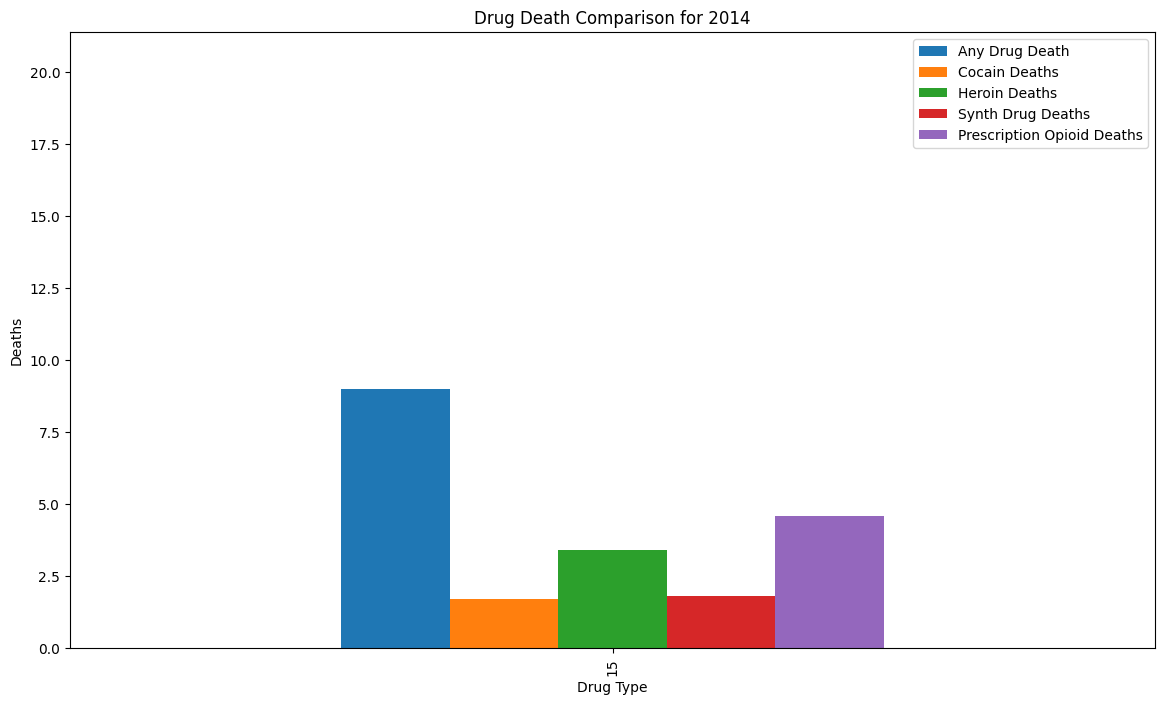

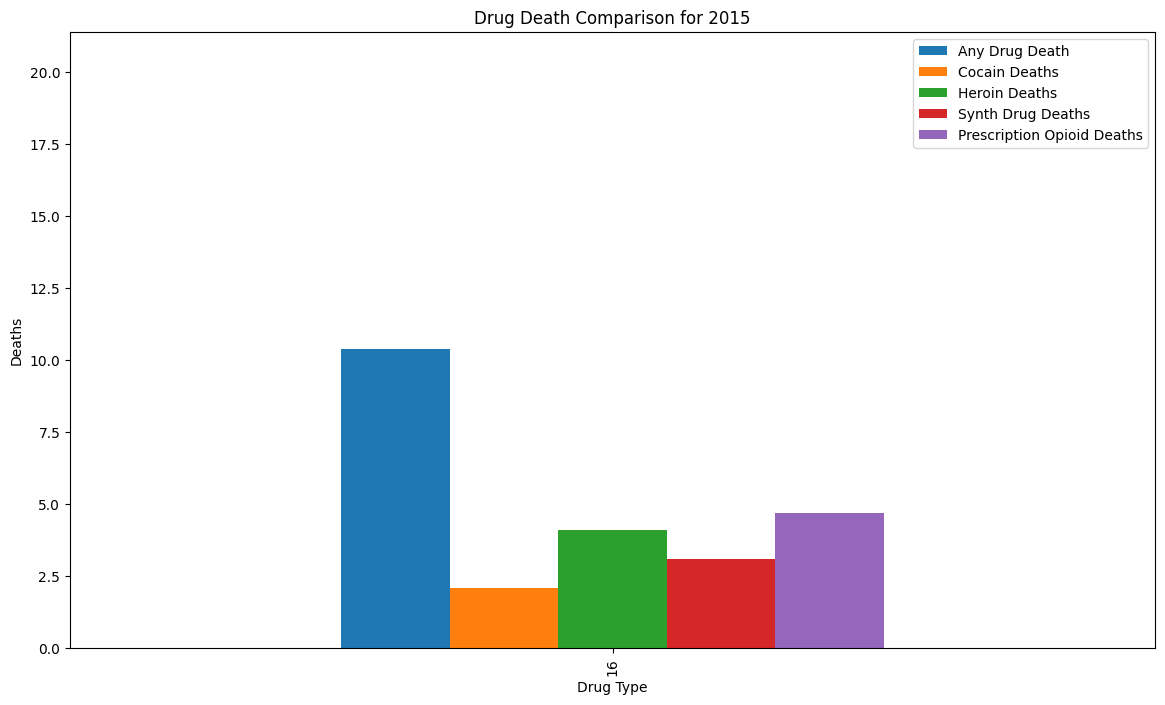

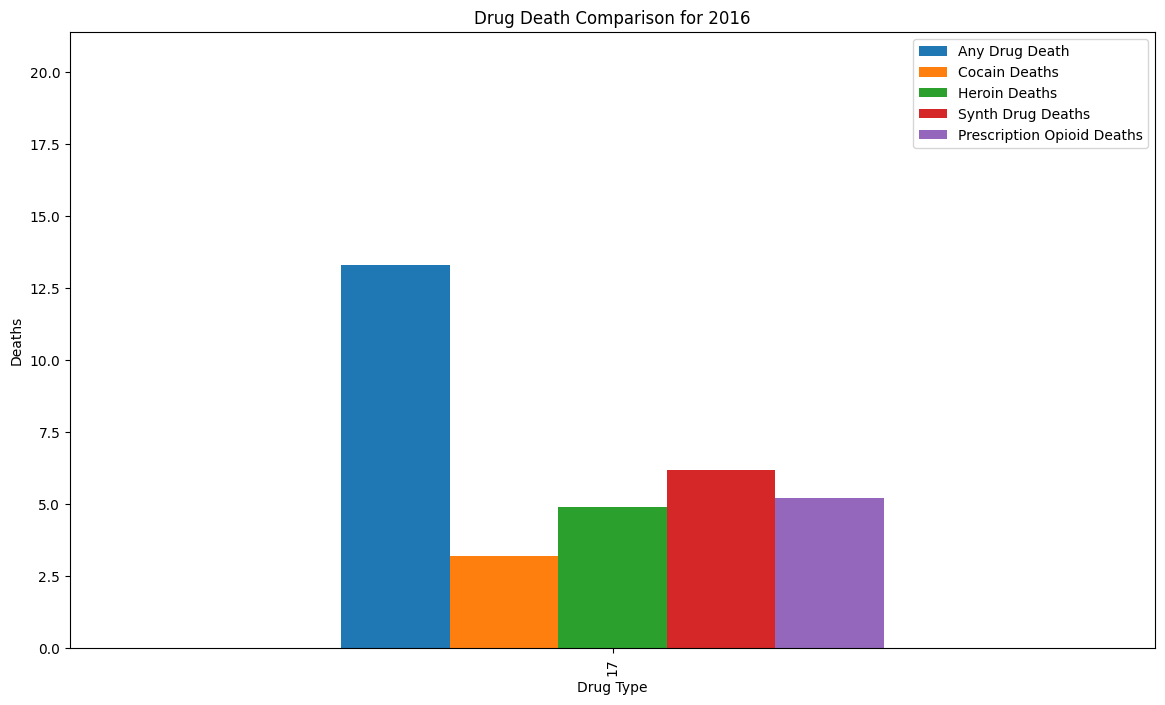

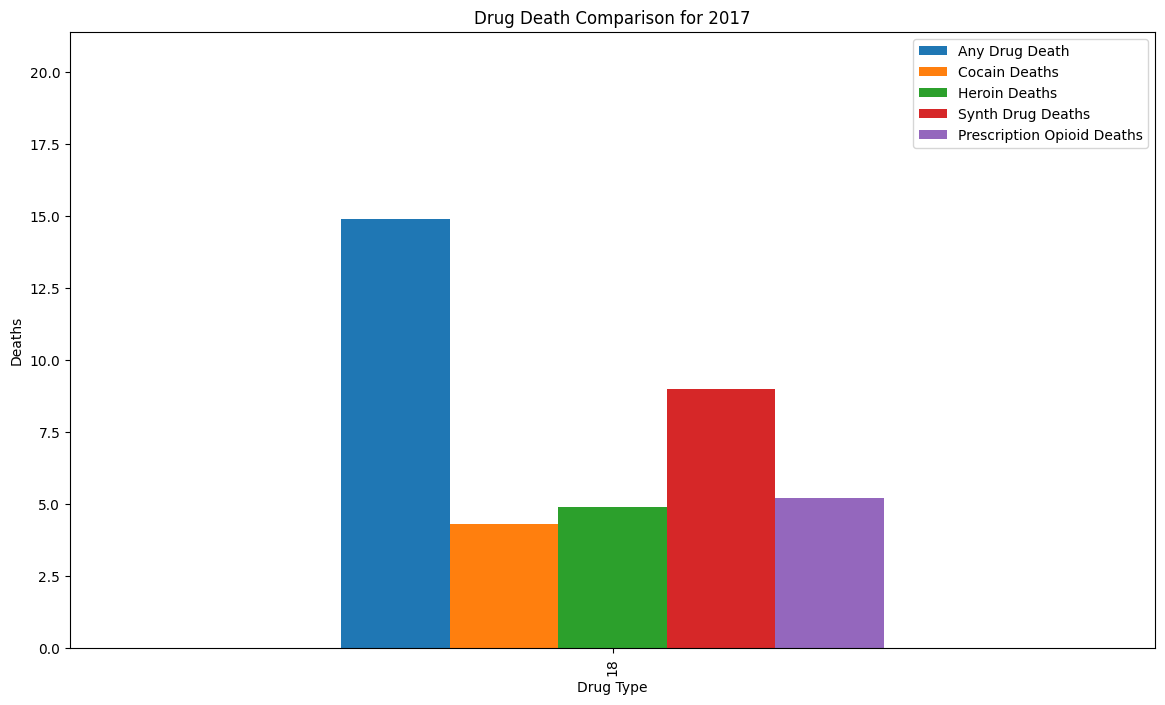

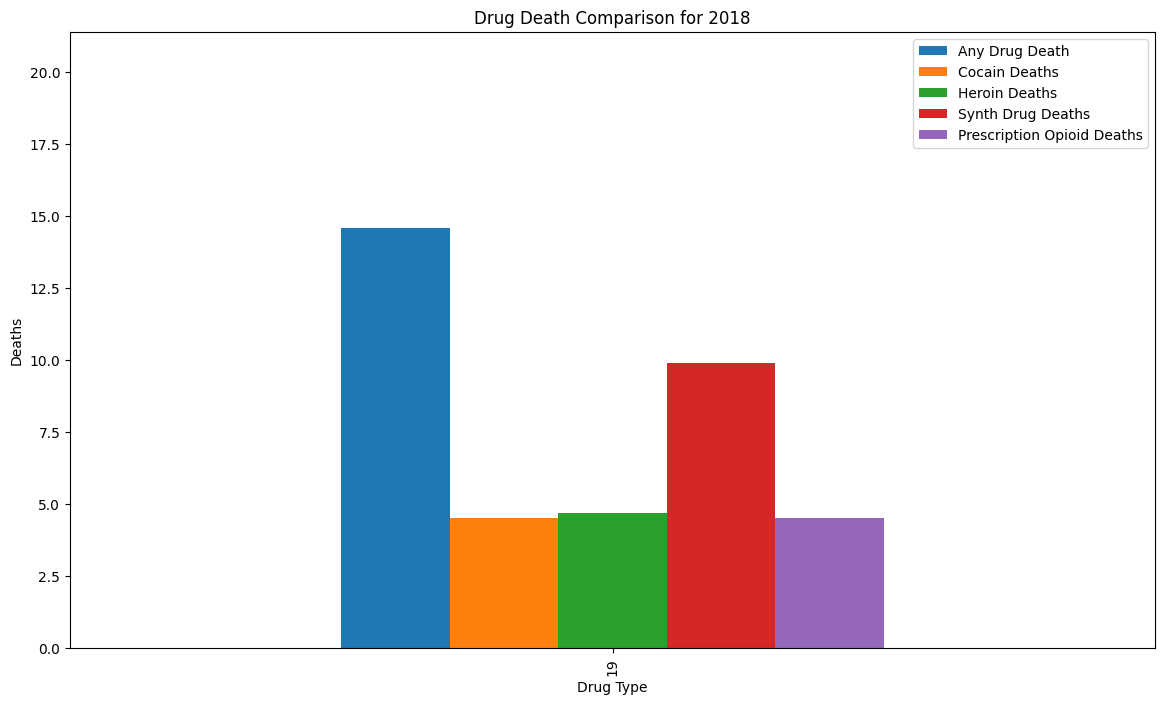

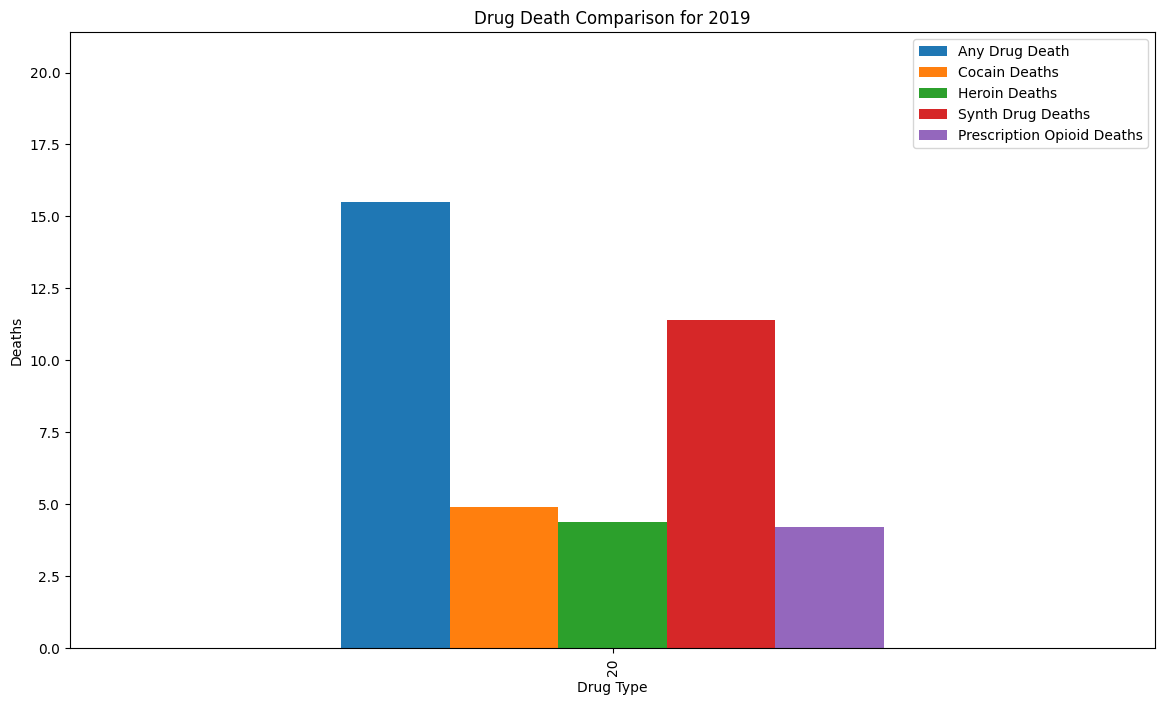

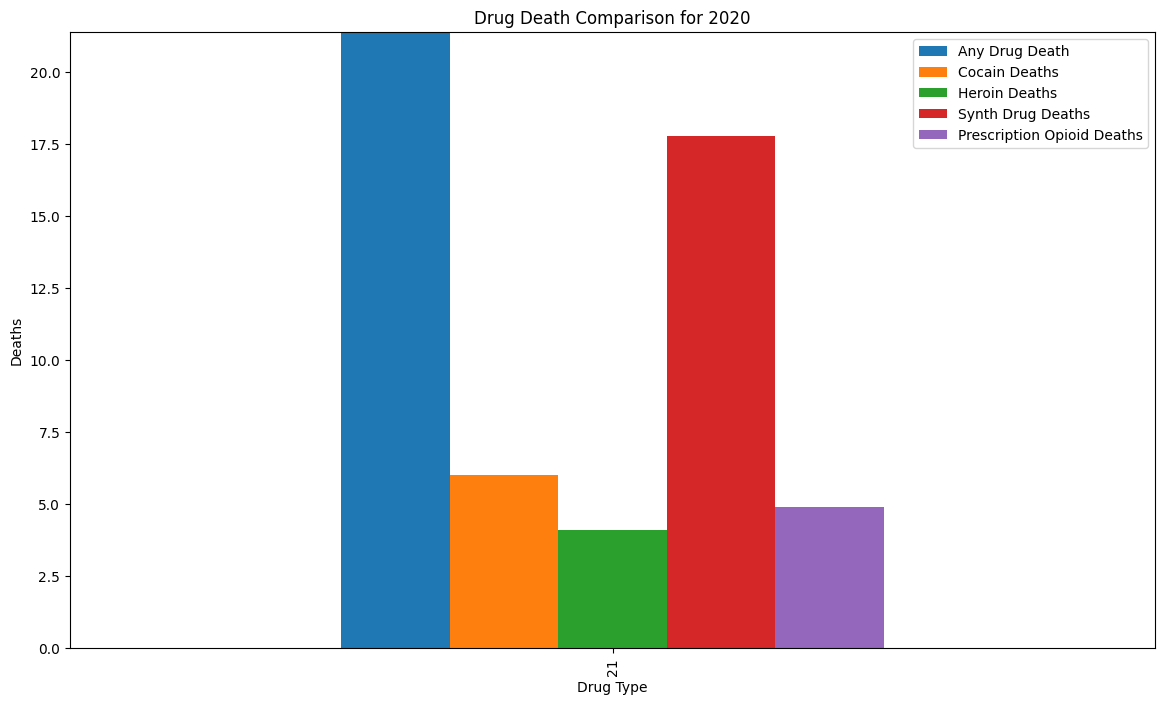

In [75]:
years = drugdf['Year'].unique() # get unique years

global_max = drugdf[column_list].max().max()

for year in years:
    data_for_year = drugdf[drugdf['Year'] == year]
    data_for_year[column_list].plot(kind='bar', figsize=(14,8))

    plt.ylim(0, global_max)
    plt.title(f"Drug Death Comparison for {year}")
    plt.xlabel("Drug Type")
    plt.ylabel("Deaths")
    plt.show() # show plot